In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

This notebook plots the DCBC and cosine error evaluation of the different parcellations

In [12]:
# Load evaluation results
dcbc = pd.read_csv(base_dir + '/Models/Evaluation_01/eval_dcbc_sym_K-10.tsv', sep='\t')
dcbc

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dbcb_indiv
0,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,0,0.091854,0.111048
1,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,1,0.095631,0.167012
2,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,2,0.026171,0.048825
3,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,3,0.209580,0.296363
4,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,4,0.134436,0.125377
...,...,...,...,...,...,...,...,...,...,...,...
695,9,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.544069e+08,Ibc,half,2,7,0.033639,0.078744
696,9,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.544069e+08,Ibc,half,2,8,0.040678,0.024133
697,9,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.544069e+08,Ibc,half,2,9,0.051255,0.041154
698,9,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.544069e+08,Ibc,half,2,10,0.054737,0.014149


### DCBC for group arrangement model
Error bars indicate variation in DCBC across subjects

<AxesSubplot:xlabel='test_data', ylabel='dcbc_group'>

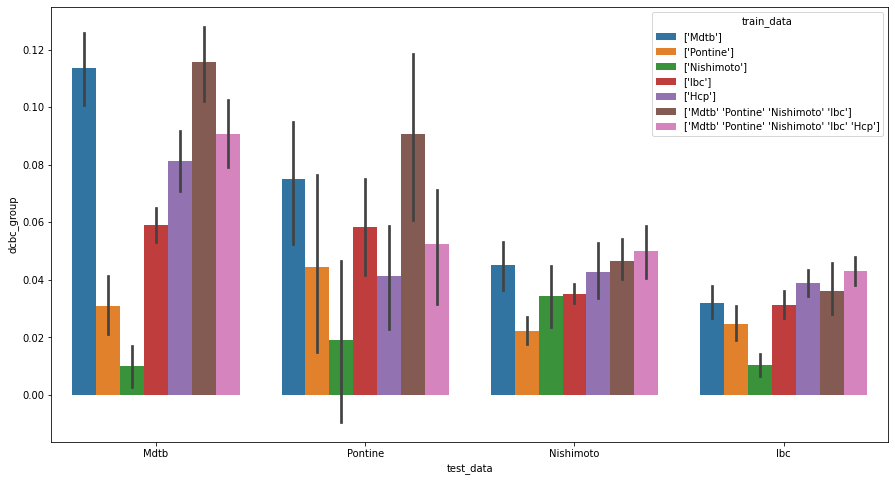

In [7]:
plt.figure(figsize=(15,8))

sb.barplot(data=dcbc, x="test_data", y="dcbc_group", hue="train_data")
# sb.barplot(data=dcbc, x="train_data", y="dcbc", hue="test_data")


## DCBC for individual parcellations

<AxesSubplot:xlabel='test_data', ylabel='dbcb_indiv'>

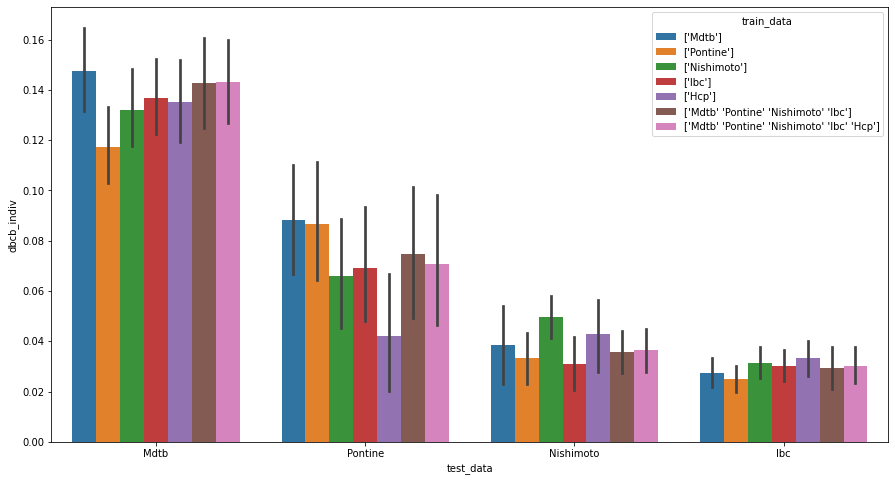

In [13]:
plt.figure(figsize=(15,8))

sb.barplot(data=dcbc, x="test_data", y="dbcb_indiv", hue="train_data")
# sb.barplot(data=dcbc, x="train_data", y="dcbc", hue="test_data")

